# Here, I build out the Langevin integrator capacities of my system. 

In [28]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import plotly
import plotly.graph_objects as grapher
import nbformat
# from __future__ import annotations
from typing import Optional, Tuple, List, Literal, Callable
from numpy.typing import NDArray
FloatArray = NDArray[np.floating]

from integrator_scripted import run
from visualizer import generate_video, generate_plot


# Experiments

### Basic First Experiment

In [29]:
# First experiment: reduced units

rng = np.random.default_rng(42)


N= 100 # number of particles
M = np.ones((N,1),dtype=float) 
dt = 1.e-3
num_steps = 10**4
T = 1.0
gamma = 15
kB = 10 

# starting positins in a small Gaussian, then center at (0,0,0)
q = 10 * rng.normal(size=(N,3))
q -= q.mean(axis=0, keepdims=True)

# starting momenta are boltzmann distributed with stdev = sqrt(mkBT) per component
p_std = np.sqrt(M * kB * T)         
p = 10*p_std * rng.normal(size=(N,3))
# here, we 'center' the momenta so they're not biased in a given direction
p -= p.mean(axis=0, keepdims=True)
p0,q0 = p,q

potential_type = "harmonic"
kSpring=.1


pTable,qTable,UTable,other_Data = run(p0,q0,num_steps=num_steps,
                           N=N,M=M,dt=dt,gamma=gamma,kB=kB,T=T,
                           potential_type="harmonic",
                           timing = True,printing_steps=True)

print(f"other data = {other_Data}")

print(qTable.shape)

At step 1000 out of 10000
At step 2000 out of 10000
At step 3000 out of 10000
At step 4000 out of 10000
At step 5000 out of 10000
At step 6000 out of 10000
At step 7000 out of 10000
At step 8000 out of 10000
At step 9000 out of 10000
other data = {'time': 6.652077583130449, 'systemLength': 10000, 'T': 1.0, 'kB': 10, 'gamma': 15, 'dt': 0.001}
(10001, 100, 3)


#### Some Simple Timing Experiments: NOT RUNNING
- Note that I reuse most of the parameters from the first experiment

In [30]:
timing_experiments = False
if timing_experiments:
    time_table_in_N = []
    Ns = []
    for exp in np.arange(1,6,0.1):
        N_exp = 10**exp
        print(f"N = {N_exp}")
        Ns.append(exp)
        _,_,_,o = run(p0,q0,num_steps=num_steps,
                            N=N_exp,M=M,dt=dt,gamma=gamma,kB=kB,T=T,
                            potential_type="harmonic",
                            timing = True,printing_steps=False)
        time_table_in_N.append(o['time'])

    plt.plot(Ns,time_table_in_N)
    plt.title('Timing vs N')
    plt.xlabel('N')
    plt.ylabel('Time (s)')
    plt.show()

# Import Visualization Tools

In [31]:
print(other_Data)

{'time': 6.652077583130449, 'systemLength': 10000, 'T': 1.0, 'kB': 10, 'gamma': 15, 'dt': 0.001}


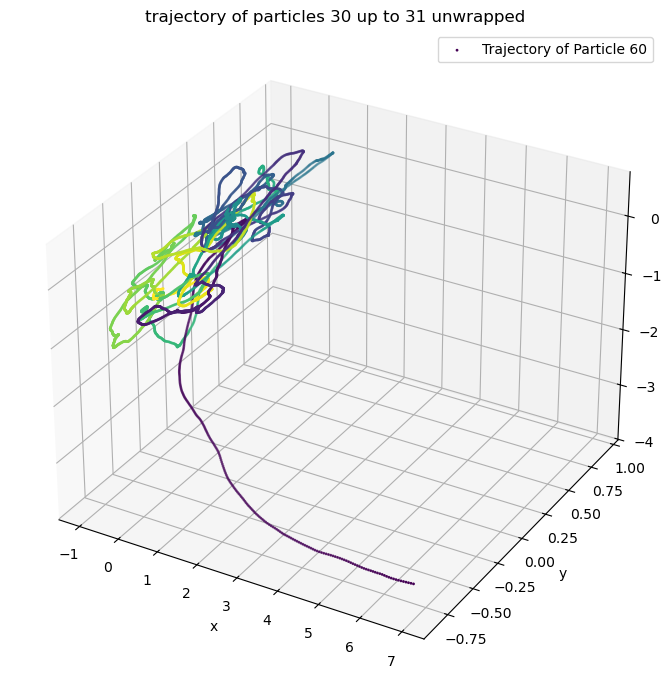

In [33]:
from visualizer import generate_video, generate_plot

def visualize(qTable,L,outfile:Optional[str]=None,show:bool= True):
    fig = generate_video(qTable,L,outfile=outfile if outfile else 'outfile.html')
    if show:
        fig.show(renderer= "browser")

def plot(qTable,L,unwrap:bool = False,numParticles:int = 1,idx:Optional[int]=None):
    fig, ax = generate_plot(qTable,L,step=1,idx=0 if idx is None else idx,unwrap=unwrap,numParticles=numParticles)
    plt.show()



# visualize(qTable=qTable,L=10**4,outfile='secondTry.html',show=False)
plot(qTable=qTable,L=10**4,unwrap=True,numParticles=1,idx=30)